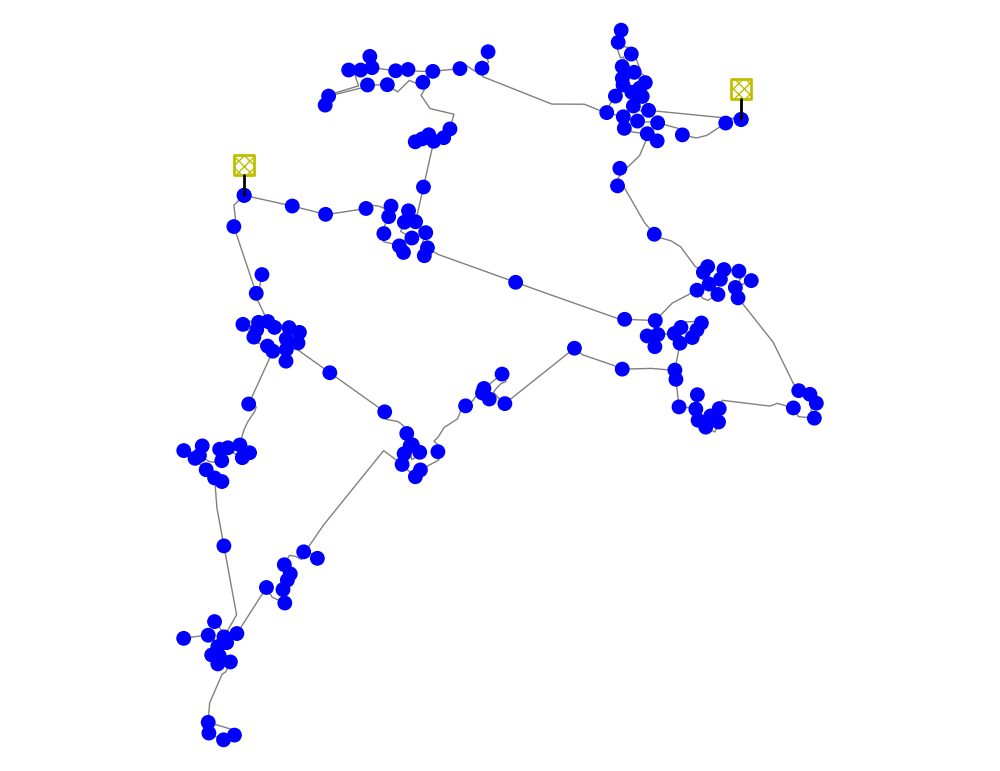

<AxesSubplot:>

In [1]:
# Testing simple plot command.

import pandas as pd
import pandapower.plotting as plot
import pandapower.networks as nw
import pandapower as pp

net = nw.mv_oberrhein()     # Loading n/w 'oberrhein'

pp.runpp(net)       # Running load flow analysis

plot.simple_plot(net, show_plot=True)   # simple plot of net

The number of given colors (1) is smaller than the number of nodes (179) to draw! The colors will be repeated to fit.


    name  vn_kv type zone  in_service
0  Bus 0   20.0    n    A        True
1  Bus 1   20.0    n    A        True
2  Bus 2   20.0    n    A        True
3  Bus 3   20.0    n    A        True
4  Bus 4   20.0    n    A        True

        name  vn_kv type zone  in_service
0      Bus 0   20.0    n    A        True
1      Bus 1   20.0    n    A        True
2      Bus 2   20.0    n    A        True
3      Bus 3   20.0    n    A        True
4      Bus 4   20.0    n    A        True
..       ...    ...  ...  ...         ...
315  Bus 174   20.0    n    B        True
316  Bus 175   20.0    n    B        True
317  Bus 176   20.0    n    B        True
318  Bus 177  110.0    b    B        True
319  Bus 178   20.0    b    B        True

[179 rows x 5 columns]


<AxesSubplot:>

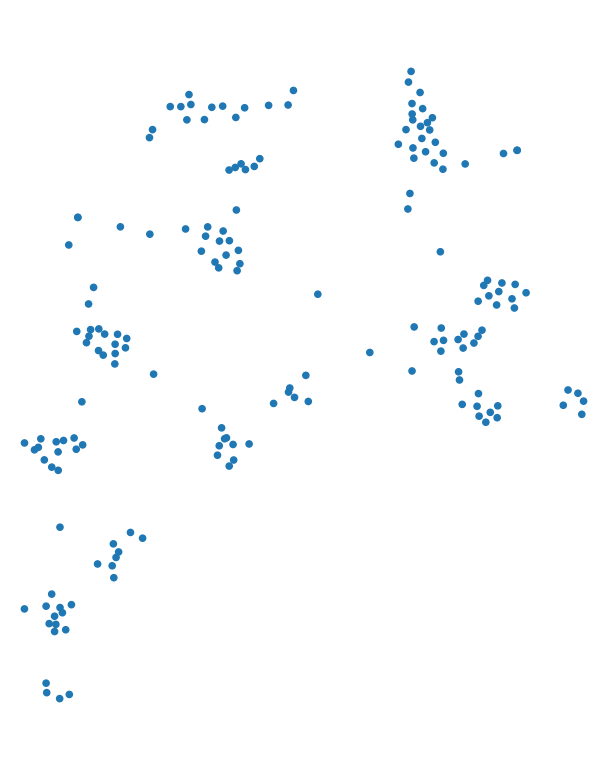

In [2]:
# Split the n/w in 2 zones (A & B).

import matplotlib.pyplot as plt
import os
import pandapower.plotting as plot
import pandapower.networks as nw
try:
    import seaborn
    colors = seaborn.color_palette()
except:
    colors = ["b", "g", "r", "c", "y"]
%matplotlib inline

net = nw.mv_oberrhein()
nr_bus = len(net.bus.index)//2      # Will be used for indexing
net.bus.loc[net.bus.index[:nr_bus], "zone"] = "A"   # Making changes directly in the dataframe by using index values.
net.bus.loc[net.bus.index[nr_bus:], "zone"] = "B"   # Making changes directly in the dataframe by using index values.
print(net.bus.head())  # 'head' prints you the head of the dataframe. You can only see parts of it to get an overview of it.
print()
print(net.bus)
bc = plot.create_bus_collection(net,net.bus.index,size=80,color=colors[0])
plot.draw_collections([bc], figsize=(6,8))      # plot buses only


In [3]:
net.bus.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,  29,
            ...
            304, 305, 312, 313, 314, 315, 316, 317, 318, 319],
           dtype='int64', length=179)

The number of given colors (1) is smaller than the number of nodes (179) to draw! The colors will be repeated to fit.
The number of given colors (1) is smaller than the number of nodes (90) to draw! The colors will be repeated to fit.


<AxesSubplot:>

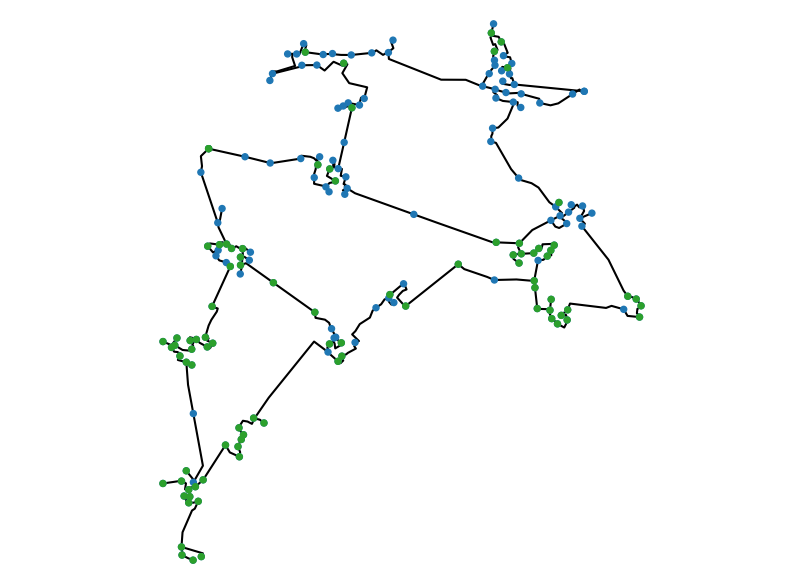

In [4]:
# Plotting the n/w that was previously split, in 2 distinct colors.

zone_b = net.bus[net.bus.zone=="B"].index
b_t = plot.create_bus_collection(net,net.bus.index,size=90,color=colors[0],zorder=10)
b_b = plot.create_bus_collection(net,zone_b,size=90,color=colors[2],zorder=11)  #'zorder' value dictates overwriting powers. Higher zorder will be on top.
lc = plot.create_line_collection(net,net.line.index,color="black",zorder=1)
plot.draw_collections([lc,b_t,b_b],figsize=(8,6))

<AxesSubplot:>

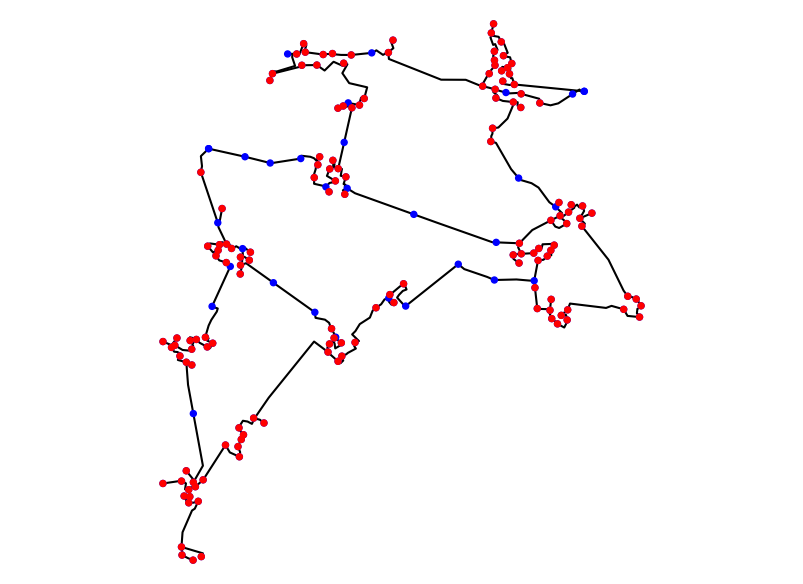

In [5]:
# Plot all nodes which have a load connected in red, and all other nodes in blue.

zone_b = net.bus[net.bus.zone=="B"].index   #Copying indexes in a varible so they can be used to change the values directly in the dataframe.
b_t = plot.create_bus_collection(net,net.bus.index,size=90,color="blue",zorder=10)  #Buses highlighted in blue.
lc = plot.create_line_collection(net,net.line.index,color="black",zorder=1)     # For lines
zc = plot.create_bus_collection(net,net.load.bus.values,size=90,color="red",zorder=12)      #Buses connected to loads are highlighted in red.
plot.draw_collections([lc,b_t,zc],figsize=(8,6))

<AxesSubplot:>

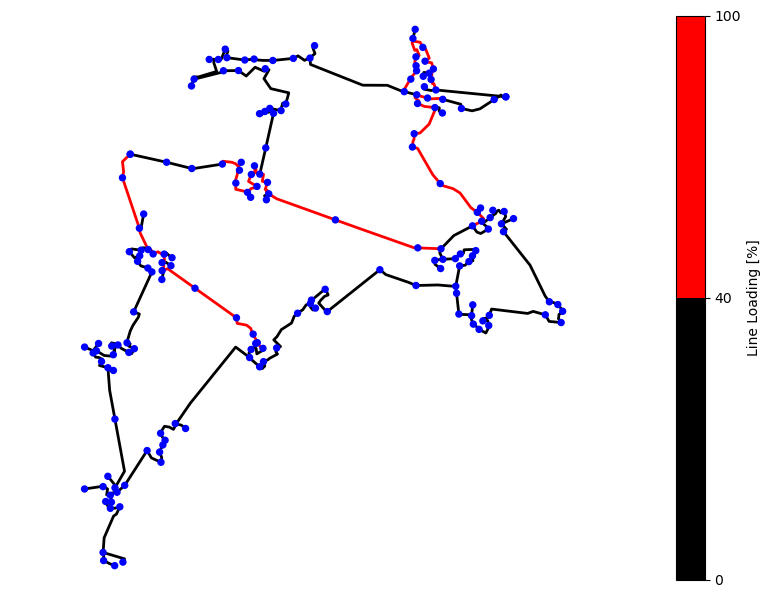

In [19]:
# Run powerflow and plot all lines with loading more than 40% in red.

pp.runpp(net)

cmap_list = [((0,40),"black"),((40,100),"red")]
cmap,norm = plot.cmap_discrete(cmap_list)
lc = plot.create_line_collection(net,net.line.index, zorder=1,cmap=cmap, norm=norm,linewidths=2)
plot.draw_collections([lc,b_t],figsize=(8,6))


In [21]:
# Determining total number of lines in the n/w with loading greater than 40%

print(net.res_line[net.res_line.loading_percent>=40]["loading_percent"])
print("*********")
print("Total buses with line loading > 40% = ",len(net.res_line[net.res_line.loading_percent>=40]["loading_percent"]))

15     42.859534
24     40.104970
27     52.060962
28     47.341651
36     51.613683
37     49.986444
38     54.917657
39     56.339637
41     49.057432
45     40.086747
46     45.930180
47     45.978169
50     46.004531
54     52.630092
56     40.024577
70     43.390767
72     45.828456
75     41.434331
127    55.580519
136    54.427497
137    50.129147
138    53.243563
141    47.153003
143    44.797110
151    48.974236
153    44.184495
154    42.995742
161    52.117530
170    46.137309
171    47.348814
172    54.388370
173    50.730337
175    56.047929
178    52.334229
179    55.386610
180    45.773653
181    56.796475
182    50.487858
183    52.129538
185    50.727960
187    47.673169
189    40.545218
190    42.487314
191    43.699131
192    57.798449
193    56.915376
Name: loading_percent, dtype: float64
*********
Total buses with line loading > 40% =  46
